In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import source data files
quarter1_df = pd.read_csv("data/LoanStats_2018Q1.csv")
quarter2_df = pd.read_csv("data/LoanStats_2018Q2.csv")
quarter3_df = pd.read_csv("data/LoanStats_2018Q3.csv")
quarter4_df = pd.read_csv("data/LoanStats_2018Q4.csv")
fed_data = pd.read_csv("data/DRCCLACBS - federal reserve delinquency rates.csv")
list(quarter1_df)


C:\Users\jcfis\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\jcfis\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [4]:
# create dataframes with data needed for delinquency analysis
collumns = ["loan_amnt","int_rate","grade","loan_status",'delinq_amnt','tot_cur_bal']
cleanQ1 = quarter1_df[collumns]
cleanQ1 = cleanQ1.dropna(how = "any")
cleanQ2 = quarter2_df[collumns]
cleanQ2 = cleanQ2.dropna(how = "any")
cleanQ3 = quarter3_df[collumns]
cleanQ3 = cleanQ3.dropna(how = "any")
cleanQ4 = quarter4_df[collumns]
cleanQ4 = cleanQ4.dropna(how = "any")


# Add quarter column to data source
cleanQ1["QUARTER"] = "Q1"
cleanQ2["QUARTER"] = "Q2"
cleanQ3["QUARTER"] = "Q3"
cleanQ4["QUARTER"] = "Q4"


# Merge Clean Data to create a large master table
combined1 = pd.merge(cleanQ1,cleanQ2 ,how="outer")
combined2 = pd.merge(combined1,cleanQ3 ,how="outer")
combined_Final = pd.merge(combined2,cleanQ4 ,how="outer")

# format the Date collumn to Date/time, isolate 2018 data,reset index and rename columns
fed_data["DATE"] = pd.to_datetime(fed_data["DATE"])
fed_data2018 = fed_data[fed_data["DATE"]>="1/1/2018"]
fed_data2018 = fed_data2018.rename(columns={'DRCCLACBS':'DLQ Rate'})
fed_data2018 = fed_data2018.reset_index()
fed_data2018

combined_Final.head()

,loan_amnt,int_rate,grade,loan_status,delinq_amnt,tot_cur_bal,QUARTER
0,30000.0,7.34%,A,Fully Paid,0.0,12704.0,Q1
1,34825.0,12.61%,C,Current,0.0,68270.0,Q1
2,2600.0,7.96%,A,Current,0.0,241067.0,Q1
3,20000.0,9.92%,B,Current,0.0,365026.0,Q1
4,17000.0,20.39%,D,Current,0.0,18039.0,Q1


In [30]:
# count Q1 records and dlq records to create 1st Quarter DLQ Rate
Q1_Total = cleanQ1["QUARTER"].count()
Q1_Late = cleanQ1[(cleanQ1["loan_status"]== "Late (31-120 days)") | (cleanQ1["loan_status"]== "Late (16-30 days)")]
Q1_DLQ = Q1_Late["loan_status"].count()
Q1_DLQ_Rate = Q1_DLQ/Q1_Total*100

# count Q2 records and dlq records to create 2nd Quarter DLQ Rate
Q2_Total = cleanQ2["QUARTER"].count()
Q2_Late = cleanQ2[(cleanQ2["loan_status"]== "Late (31-120 days)") | (cleanQ2["loan_status"]== "Late (16-30 days)")]
Q2_DLQ = Q2_Late["loan_status"].count()
Q2_DLQ_Rate = Q2_DLQ/Q2_Total*100

# count Q2 records and dlq records to create 2nd Quarter DLQ Rate
Q3_Total = cleanQ3["QUARTER"].count()
Q3_Late = cleanQ3[(cleanQ3["loan_status"]== "Late (31-120 days)") | (cleanQ3["loan_status"]== "Late (16-30 days)")]
Q3_DLQ = Q3_Late["loan_status"].count()
Q3_DLQ_Rate = Q3_DLQ/Q3_Total*100

Q4_Total = cleanQ4["QUARTER"].count()
Q4_Late = cleanQ4[(cleanQ4["loan_status"]== "Late (31-120 days)") | (cleanQ4["loan_status"]== "Late (16-30 days)")]
Q4_DLQ = Q4_Late["loan_status"].count()
Q4_DLQ_Rate = Q4_DLQ/Q4_Total*100


print(Q1_DLQ_Rate)
print(Q2_DLQ_Rate)
print(Q3_DLQ_Rate)
print(Q4_DLQ_Rate)

d = {'QUARTER': ["Q1", "Q2","Q3","Q4"], 'DLQRate': [Q1_DLQ_Rate,Q2_DLQ_Rate,Q3_DLQ_Rate,Q4_DLQ_Rate]}
Clean_df = pd.DataFrame(data=d)
# Clean_df = Clean_df.style.format({"DLQRate": "{:.2f}%"})


Clean_df

2.2760142401542685
2.191600648456856
1.3877404558715696
0.5700401831604524


,QUARTER,DLQRate
0,Q1,2.276014
1,Q2,2.191601
2,Q3,1.387740
3,Q4,0.570040


In [31]:
combined_Final["loan_status"].value_counts()


Current               437318
Fully Paid             40240
Charged Off             6942
Late (31-120 days)      6509
In Grace Period         2901
Late (16-30 days)       1323
Default                    9
Name: loan_status, dtype: int64

In [32]:
merged_DF = pd.merge(fed_data2018,Clean_df, left_on ="QUARTER",right_on="QUARTER")

merged_DF


,index,DATE,QUARTER,DLQ Rate,DLQRate
0,108,2018-01-01,Q1,2.54,2.276014
1,109,2018-04-01,Q2,2.48,2.191601
2,110,2018-07-01,Q3,2.49,1.387740
3,111,2018-10-01,Q4,2.54,0.570040


In [33]:
# Assigns grade Rank
combined_Final["Grade_rank"] = ""
combined_Final.loc[combined_Final['grade'] == "A", ('Grade_rank')] = (7)
combined_Final.loc[combined_Final['grade'] == "B", ('Grade_rank')] = (6)
combined_Final.loc[combined_Final['grade'] == "C", ('Grade_rank')] = (5)
combined_Final.loc[combined_Final['grade'] == "D", ('Grade_rank')] = (4)
combined_Final.loc[combined_Final['grade'] == "E", ('Grade_rank')] = (3)
combined_Final.loc[combined_Final['grade'] == "F", ('Grade_rank')] = (2)
combined_Final.loc[combined_Final['grade'] == "G", ('Grade_rank')] = (1)

combined_Final["Grade_rank"].value_counts()

combined_Final["DLQ"] = ""
combined_Final.loc[combined_Final['loan_status'] == "Current", ('DLQ')] = ("No")
combined_Final.loc[combined_Final['loan_status'] == "Fully Paid", ('DLQ')] = ("No")
combined_Final.loc[combined_Final['loan_status'] == "Charged Off ", ('DLQ')] = ("Yes")
combined_Final.loc[combined_Final['loan_status'] == "Late (31-120 days)", ('DLQ')] = ("Yes")
combined_Final.loc[combined_Final['loan_status'] == "In Grace Period", ('DLQ')] = ("No")
combined_Final.loc[combined_Final['loan_status'] == "Default", ('DLQ')] = ("Yes")

combined_Final.head()

,loan_amnt,int_rate,grade,loan_status,delinq_amnt,tot_cur_bal,QUARTER,Grade_rank,DLQ
0,30000.0,7.34%,A,Fully Paid,0.0,12704.0,Q1,7,No
1,34825.0,12.61%,C,Current,0.0,68270.0,Q1,5,No
2,2600.0,7.96%,A,Current,0.0,241067.0,Q1,7,No
3,20000.0,9.92%,B,Current,0.0,365026.0,Q1,6,No
4,17000.0,20.39%,D,Current,0.0,18039.0,Q1,4,No


In [13]:
fed_data2018
Clean_df

,QUARTER,DLQRate
0,Q1,2.276014
1,Q2,2.191601
2,Q3,1.387740
3,Q4,0.570040


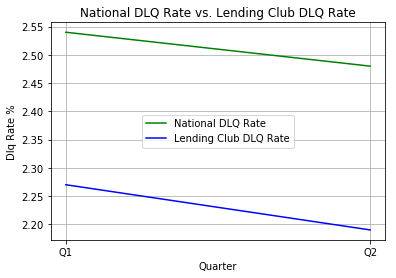

In [29]:




# Create a list of the months that we will use as our x axis
Quarters = ["Q1","Q2",]
Fed_Data = [2.54,2.48]
Data = [2.27,2.19]


# Plot our line that will be used to track a wrestler's wins over the years
plt.plot(Quarters, Fed_Data, color="green", label="National DLQ Rate")

# Plot our line that will be used to track a wrestler's losses over the years
plt.plot(Quarters, Data, color="blue", label="Lending Club DLQ Rate")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="center")

plt.title("National DLQ Rate vs. Lending Club DLQ Rate")
plt.xlabel("Quarter")
plt.ylabel("Dlq Rate %")


plt.xticks(Quarters)
# Print our chart to the screen
plt.show()